<a href="https://colab.research.google.com/github/Krshnna/Exploratory-Data-Analysis/blob/main/EDA_on_black_friday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df_train = pd.read_csv('/content/train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [28]:
df_test = pd.read_csv('/content/test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [29]:
# merge both train and test data
df = df_train.append(df_test)

<ipython-input-29-ce29e860c973>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test)


In [30]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227.0
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215.0
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854.0
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686.0
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871.0


In [31]:
df['City_Category'].is_unique

False

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [33]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [34]:
df.drop(['User_ID'], axis = 1, inplace = True)

In [35]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


### Data Preprocessing

First do label encoding on gender column 

In [36]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [37]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


There is another of doing that above thing
## df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

## Now handling categorical feature Age

In [38]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [39]:
label_encoder = preprocessing.LabelEncoder()
df['Age'] = label_encoder.fit_transform(df['Age'])
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0


In [40]:
df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1])

In [41]:
label_city = preprocessing.LabelEncoder()
df['City_Category'] = label_city.fit_transform(df['City_Category'])

In [42]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,0,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,0,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,0,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6,16,2,4+,0,8,NaN,NaN,7969.0


In [43]:
df.shape

(783667, 11)

## checking for missing values now

In [44]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [45]:
df['Product_Category_2'].unique()
# this is discrete feature

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

## If there is a nan value in discrete feature, then it must be replace by mode

In [48]:
# replacing missing value with mode
df['Product_Category_2'] =df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [49]:
df['Product_Category_2'].isnull().sum()

0

In [50]:
df['Product_Category_2'].value_counts()

8.0     337299
14.0     78834
2.0      70498
16.0     61687
15.0     54114
5.0      37165
4.0      36705
6.0      23575
11.0     20230
17.0     19104
13.0     15054
9.0       8177
12.0      7801
10.0      4420
3.0       4123
18.0      4027
7.0        854
Name: Product_Category_2, dtype: int64

## similarly do for category3

In [51]:
df['Product_Category_3'].isnull().sum()

545809

In [52]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

this is also discrete feature

In [ ]:
df['Product_Category_3'].value_counts()

In [56]:
df['Product_Category_3'].mode()[0]

16.0

In [57]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [58]:
df['Product_Category_3'].isnull().sum()

0

In [59]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,0,2,0,3,8.0,16.0,8370.0
1,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,0,2,0,12,8.0,16.0,1422.0
3,P00085442,0,0,10,0,2,0,12,14.0,16.0,1057.0
4,P00285442,1,6,16,2,4+,0,8,8.0,16.0,7969.0


In [60]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

In [61]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [64]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

<ipython-input-64-9f60e03f2c04>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')


In [65]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,0,2,0,3,8.0,16.0,8370.0
1,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,0,2,0,12,8.0,16.0,1422.0
3,P00085442,0,0,10,0,2,0,12,14.0,16.0,1057.0
4,P00285442,1,6,16,2,4,0,8,8.0,16.0,7969.0


### Since are Stay_In_Current_City_Years is in object type we have to convert it into ineger

In [66]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(str).astype(int)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 71.7+ MB


## Now do some visualization

### lets' check which has done more purchase based on gender

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],dtype=object)
{0, 1, 2, 3, 4, 5, 6}


<Axes: xlabel='Age', ylabel='Purchase'>

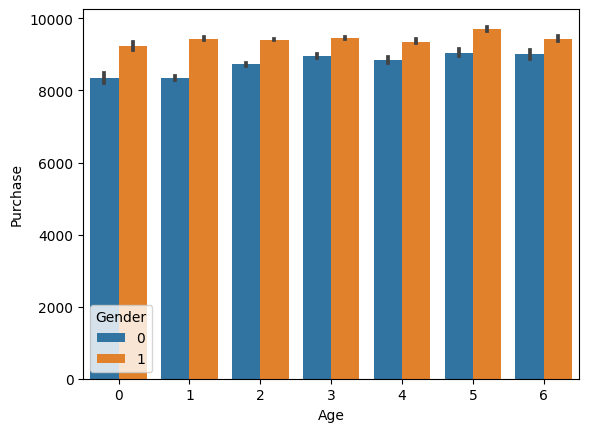

In [70]:
sns.barplot(x = 'Age', y = 'Purchase', hue = 'Gender', data = df)

### this barchart shows that males are more in purchasing as compare to females

### Now check for purchase with respect to occupations

<Axes: xlabel='Occupation', ylabel='Purchase'>

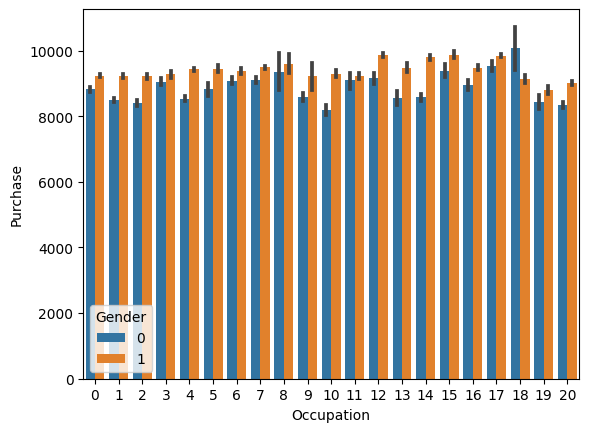

In [71]:
sns.barplot(x = "Occupation", y = "Purchase", hue = "Gender", data = df)

## Now checking for different product categories

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

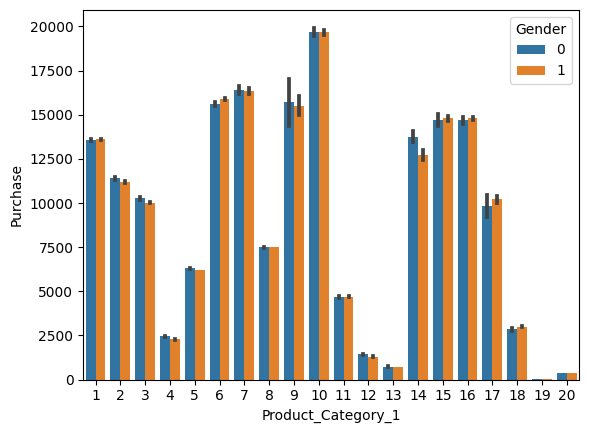

In [73]:
# For Product Category1

sns.barplot(x = "Product_Category_1", y = "Purchase", hue = "Gender", data = df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

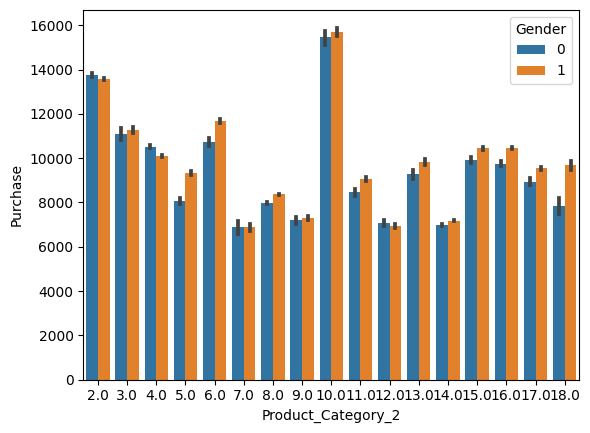

In [74]:
sns.barplot(x = "Product_Category_2", y = "Purchase", hue = "Gender", data = df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

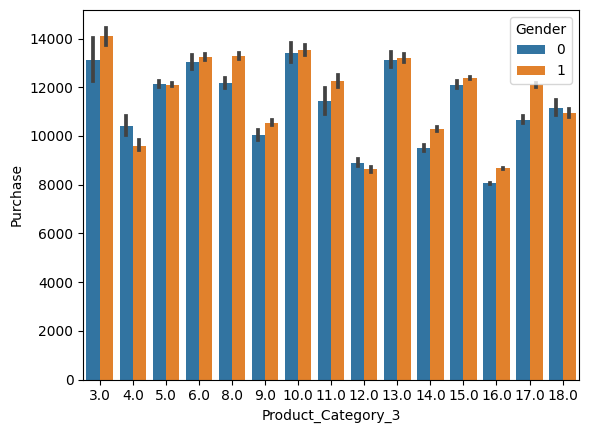

In [75]:
sns.barplot(x = "Product_Category_3", y = "Purchase", hue = "Gender", data = df)

#feature scaling

In [97]:
df = df.drop('Product_ID', axis = 1)

In [98]:
df_test = df[df['Purchase'].isnull()]
df_test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,4,7,1,2,1,1,11.0,16.0,NaN
1,1,2,17,2,0,0,3,5.0,16.0,NaN
2,0,3,1,1,4,1,5,14.0,16.0,NaN
3,0,3,1,1,4,1,4,9.0,16.0,NaN
4,0,2,1,2,1,0,4,5.0,12.0,NaN


In [99]:
df_train = df[~df['Purchase'].isnull()]
df_train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,8.0,16.0,8370.0
1,0,0,10,0,2,0,1,6.0,14.0,15200.0
2,0,0,10,0,2,0,12,8.0,16.0,1422.0
3,0,0,10,0,2,0,12,14.0,16.0,1057.0
4,1,6,16,2,4,0,8,8.0,16.0,7969.0
